In [1]:
# Import all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Use glob to sort the csv_files into a single path
csv_files = glob.glob('states*.csv')


In [9]:
# Loop through the csv_files and sort them into temporary dataframes
temp_dfs = []
for file in csv_files:
    temp_df = pd.read_csv(file)
    temp_dfs.append(temp_df)
    
# Concatenate the list of dataframes into a single dataframe
us_census = pd.concat(temp_dfs, axis = 0)
print(us_census.head(5))

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

In [10]:
# Change income into a workable datatype (numeric)
us_census['Income'] = us_census['Income'].str.replace('$', '', regex = True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

# Separate GenderPop into two columns Gender and Population
gen_split = us_census['GenderPop'].str.split('_', expand = True)
gen_split[0] = gen_split[0].replace('M', '', regex = True)
gen_split[1] = gen_split[1].replace('F', '', regex = True)
#print(gen_split)

# Create the two new columns and remove the old 'GenderPop' column in us_census dataframe
us_census['Male Population'] = gen_split[0]
us_census['Female Population'] = gen_split[1]
us_census = us_census.drop('GenderPop', axis = 1)

# Convert the new columns into the numeric datatype
us_census['Male Population'] = pd.to_numeric(us_census['Male Population'])
us_census['Female Population'] = pd.to_numeric(us_census['Female Population'])

# Fill in any Null values within the population columns with estimates from TotalPop
us_census = us_census.fillna(value={
  'Female Population': us_census['TotalPop'] - us_census['Male Population']
})

# Drop all duplicate data entries
us_census = us_census.drop_duplicates('State')
#print(us_census.head(5))


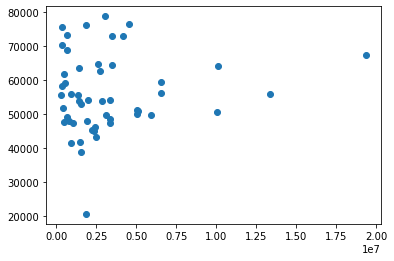

In [11]:
# Create a scatterplot showing the relation of Female Population and Income
plt.scatter(us_census['Female Population'], us_census['Income'])
plt.show()

In [12]:
# Clean all race data for analysis (Remove symbols and convert to numeric)
us_census['Hispanic'] = us_census['Hispanic'].str.replace('%', '', regex = True)
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
#
us_census['White'] = us_census['White'].str.replace('%', '', regex = True)
us_census['White'] = pd.to_numeric(us_census['White'])
#
us_census['Black'] = us_census['Black'].str.replace('%', '', regex = True)
us_census['Black'] = pd.to_numeric(us_census['Black'])
#
us_census['Native'] = us_census['Native'].str.replace('%', '', regex = True)
us_census['Native'] = pd.to_numeric(us_census['Native'])
#
us_census['Asian'] = us_census['Asian'].str.replace('%', '', regex = True)
us_census['Asian'] = pd.to_numeric(us_census['Asian'])
#
us_census['Pacific'] = us_census['Pacific'].str.replace('%', '', regex = True)
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])
#

# Fill Null values within Pacific column with the us_census average
us_census = us_census.fillna(value={
  'Pacific': us_census['Pacific'].mean()
})


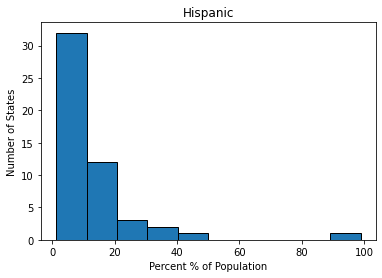

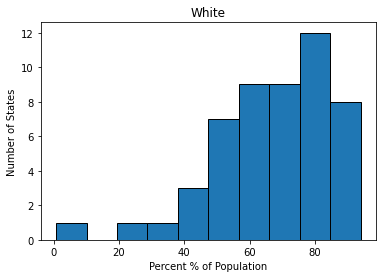

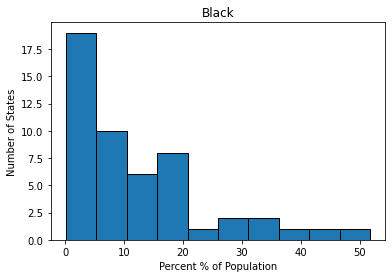

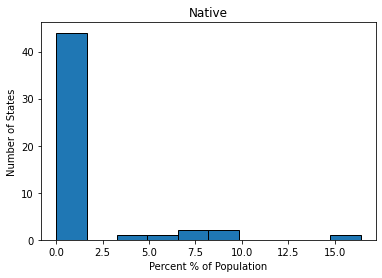

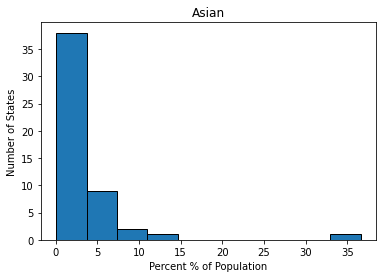

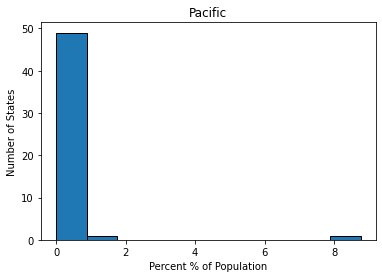

   Unnamed: 0                 State  TotalPop   Hispanic      White  \
0           0               Alabama   4830620   3.751616  61.878656   
1           1                Alaska    733375   5.909581  60.910180   
2           2               Arizona   6641928  29.565921  57.120000   
3           3              Arkansas   2958208   6.215474  71.137810   
4           4            California  38421464  37.291875  40.215789   
5           5              Colorado   5278906  20.784380  69.895572   
1           1           Connecticut   3593222  15.604831  67.677053   
2           2              Delaware    926454   8.824766  64.632710   
3           3  District of Columbia    647484   9.165922  33.103911   
4           4               Florida  19645772  21.338543  59.083749   
5           5               Georgia  10006693   8.418242  54.286306   
1           1                Hawaii   1406299   9.186709  25.032278   
2           2                 Idaho   1616547  11.505369  83.136242   
3     

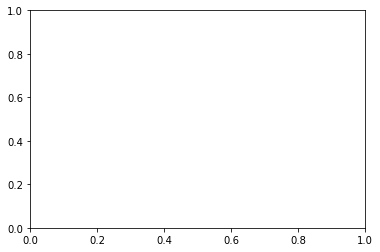

In [13]:
# Create a histogram for each of the races in the us_census
def hist_factory(df, column):
  plt.hist(df[column], edgecolor = 'black')
  plt.title(column)
  plt.xlabel('Percent % of Population')
  plt.ylabel('Number of States')
  plt.show()
  plt.cla()

hist_factory(us_census, 'Hispanic')
hist_factory(us_census, 'White')
hist_factory(us_census, 'Black')
hist_factory(us_census, 'Native')
hist_factory(us_census, 'Asian')
hist_factory(us_census, 'Pacific')
print(us_census)